## Simulating LSST-like image time-series of lensed type Ia supernovae

### Import python libraries, LSST characteristics and functions

In [1]:
import pickle as pickle
from class_telescope import Telescope
from image_time_series import simulate_time_series_images
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

### Parameter distributions 

Sample $z_l$, $z_s$ and $\theta_E$ from MC sample from Wojtak et al. (2019).


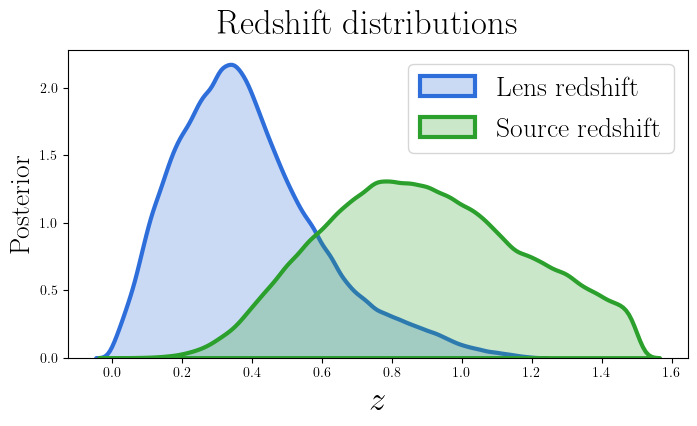

In [2]:
# ---------------------------------
telescope = 'LSST'
bandpasses = ['r', 'i', 'z', 'y']
# ---------------------------------

lsst = Telescope(telescope, bandpasses)

lsst.plot_redshifts()


### Seeing distributions
Sample the PSF from the predicted seeing distribution for the <b> baseline v2.0 </b> observing strategy for 10 years.

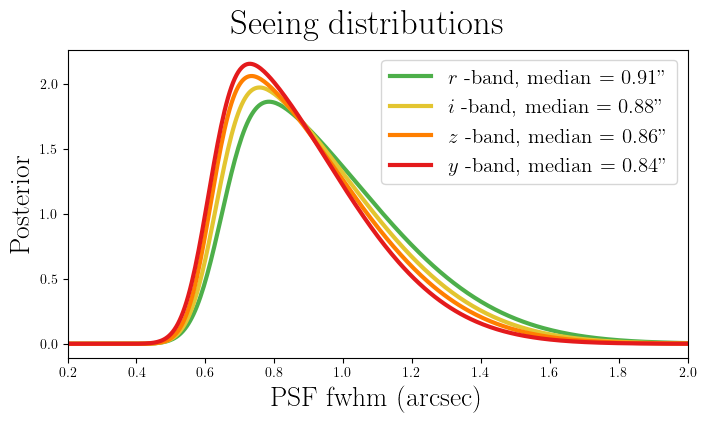

In [3]:
lsst.plot_seeing_distributions()


### Cadence

Sample the cadence from the predicted distribution for the <b> baseline v2.0 </b> observing strategy for the LSST Wide, Fast, Deep survey from Catarina Alves' simulations.


100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 375.33it/s]


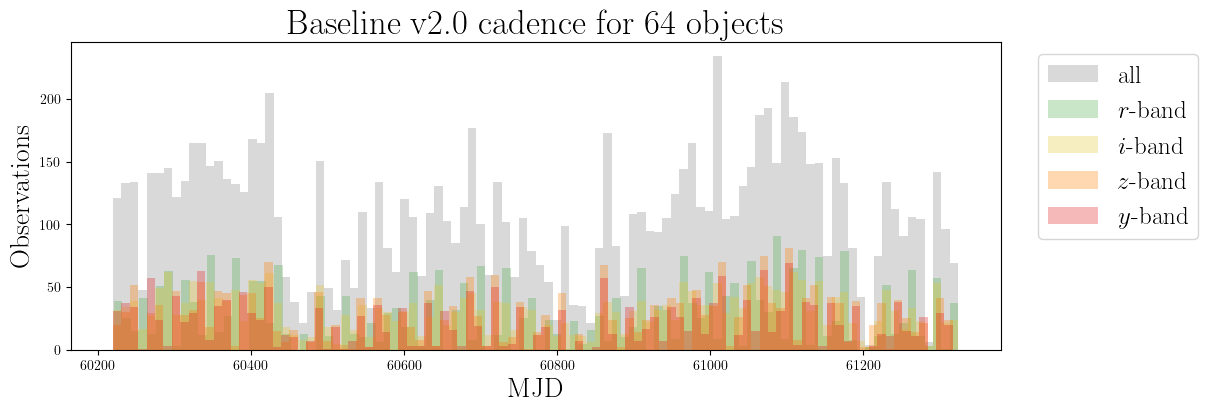

In [4]:
lsst.plot_cadence()


### Generation of training and test sets


100%|██████████████████████████████████████████| 64/64 [00:00<00:00, 367.80it/s]


Theoretically visible with image multiplicity method?            False
Theoretically visible with magnification method?                 True
Observations allow for detection with image multiplicity method? False
Observations allow for detection with magnification method?      True
 
Lens redshift:  0.7
Supernova redshift:  1.18
Einstein radius:  0.39
Time delays:  [ 0.   30.94] days
Macro magnification:  [2.89 0.57]
Microlensing contribution at peak (magnitudes):  0.0
Hubble constant:  67.8
Time-delay distance:  7965.96
Peak brightness images for r,i,z,y bands:
[[24.97   inf]
 [25.09 25.06]
 [24.04 24.81]
 [23.61 23.44]]
 


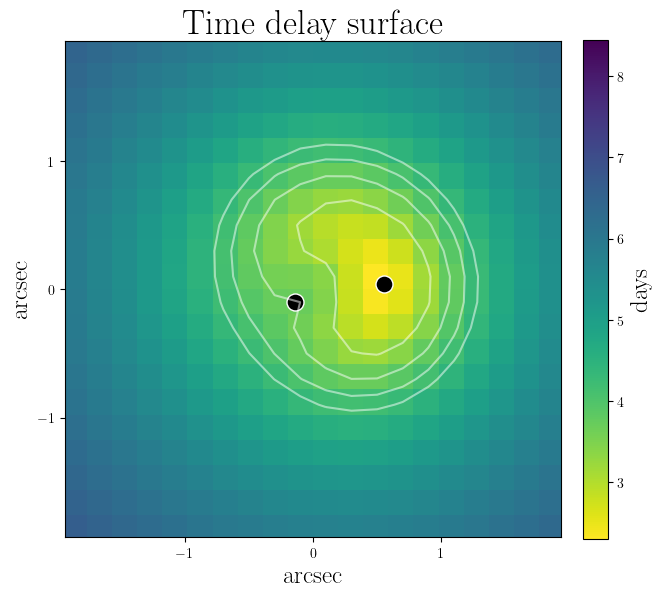

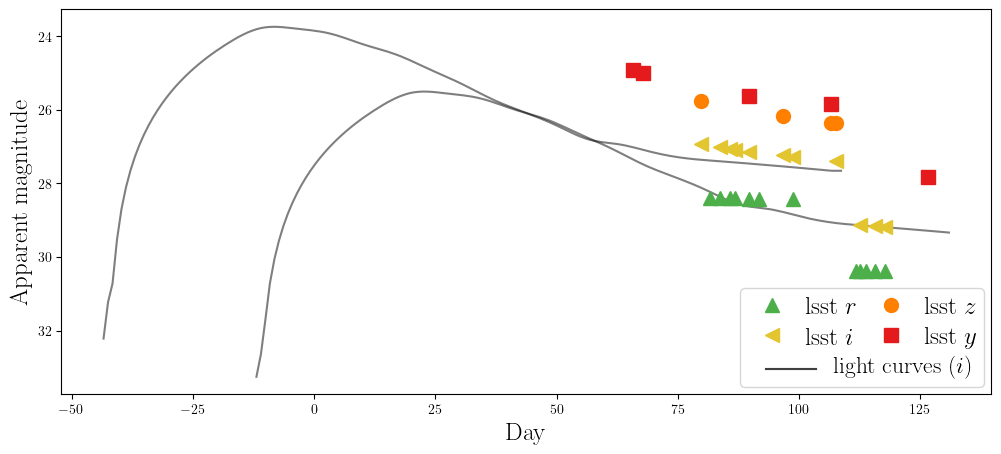

38.74107439832862 23.979850952386986
34.25881989040706 22.738837446056916
33.18245115167407 22.14205324551791
33.490104897499 22.19674271351396


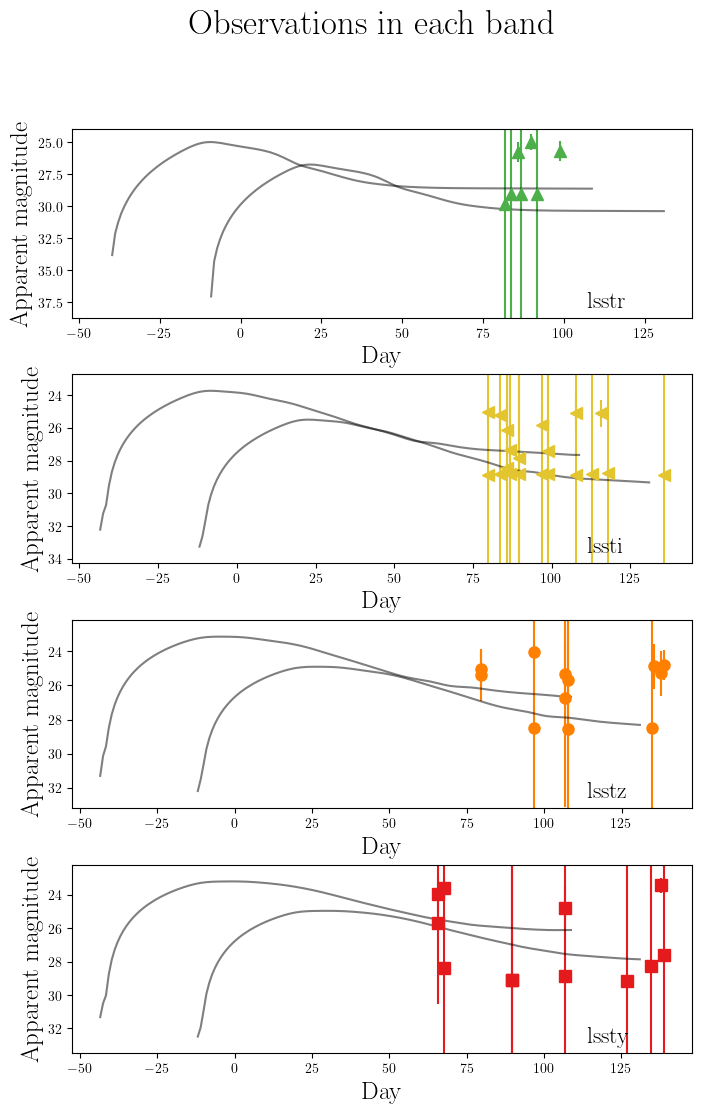

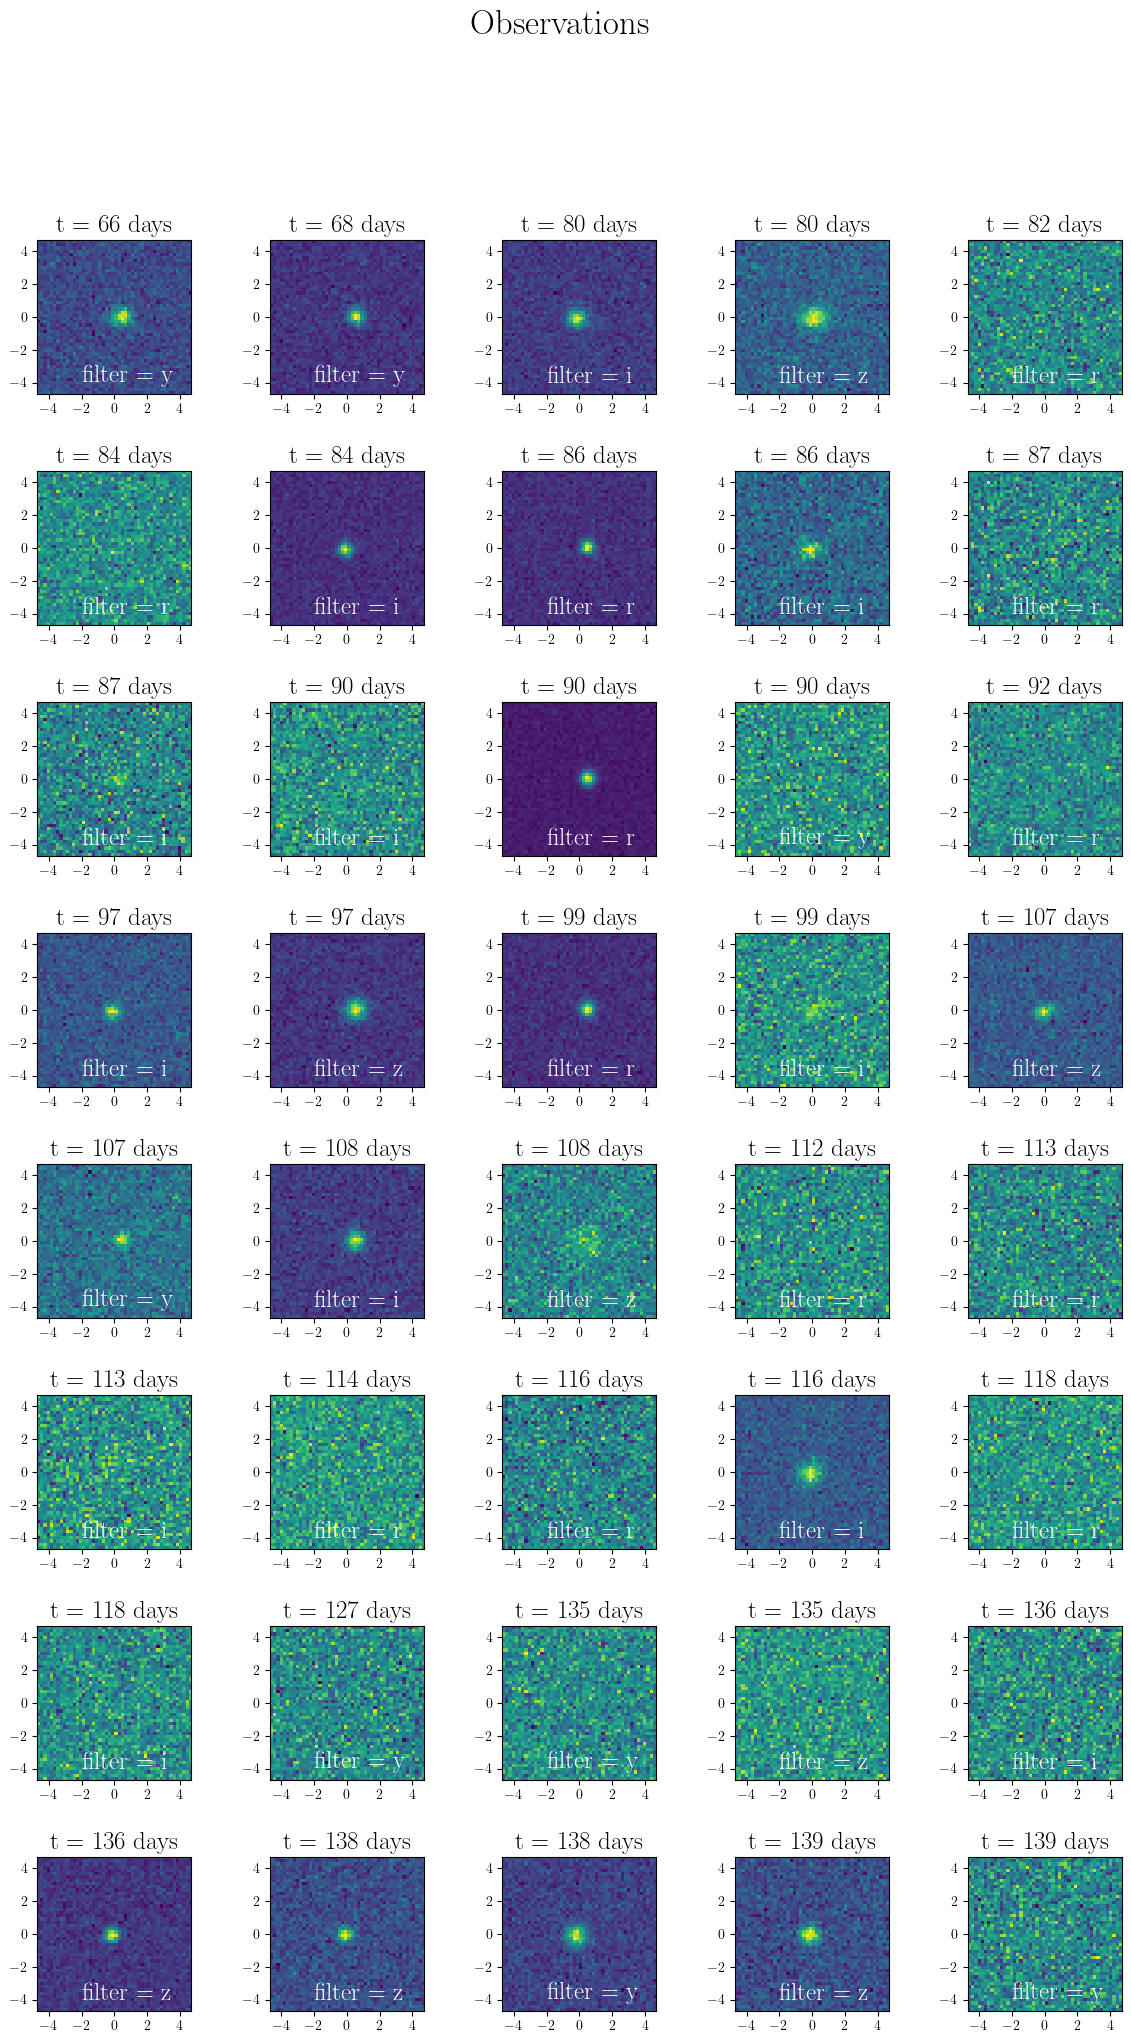

100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.04s/it]

Done!
Simulating images took  9.0 seconds ( 0.0 hours) to complete.
Number of image-time series generated:  1
Number of configurations tried:  1
Number of attempts:  20
 


100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.66s/it]

                                         time_series  z_source    z_lens  \
0  [[[1.2161420228173097, 2.0888653832775086, 1.2...  1.179697  0.701496   

     H0   theta_E                                           obs_peak  \
0  67.8  0.386822  [[24.96691334911335, inf], [25.08835800188385,...   

                                           obs_times  \
0  [65.7777516880742, 67.73655168806727, 79.73865...   

                                           obs_bands  \
0  [y, y, i, z, r, r, i, r, i, r, i, i, r, y, r, ...   

                                             obs_mag  \
0  [[23.965473579200832, 25.668345315823785], [23...   

                                       obs_mag_error  ...   obs_start  \
0  [[1.015567387384685, 4.87368482746384], [0.598...  ...  60329.3717   

      obs_end  mult_method_peak  mult_method mag_method_peak  mag_method  \
0  60402.2924             False        False            True        True   

                     coords  \
0  [188.085938, -15.868921]   



In [5]:
num_samples = 1               # Total number of lens systems to be generated  
batch_size = 1                # Number of lens systems that is saved together in a batch
batch = 1                     # Starting number of the batch
num_images = 2                # Choose between 2 (for doubles) and 4 (for quads)
obs_upper_limit = 100         # Upper limit of number of observations
obs_lower_limit = 5           # Lower limit of number of observations
fixed_H0 = True               # Bool, if False: vary H0. if True: fix H0 to 70 km/s/Mpc (for the evaluation set)
add_microlensing = False      # Bool, if False: Only macro magnification. if True: Add effects of microlensing

Show = True                   # Bool, if True: Show figures and print information about the lens systems
Save = False                  # Bool, if True: Save image time-series
path = "../processed_data/Baseline_v_2_0_/" # Path to folder in which to save the results


df, timings = simulate_time_series_images(num_samples, batch_size, batch, num_images, add_microlensing, 
                                 obs_lower_limit, obs_upper_limit, fixed_H0, lsst, Show, Save, path)


In [8]:
print(timings)

{'initiate': [0.869041919708252], 'general_properties': [0.0006129741668701172, 0.000518798828125, 0.000453948974609375, 0.00042700767517089844, 0.0004258155822753906, 0.0003528594970703125, 0.00041985511779785156, 0.00040984153747558594, 0.00038504600524902344, 0.00040411949157714844, 0.0004029273986816406, 0.0004322528839111328, 0.00042700767517089844, 0.00041413307189941406, 0.0004680156707763672, 0.0004220008850097656, 0.0004191398620605469, 0.0004019737243652344, 0.00038504600524902344, 0.0004279613494873047], 'lens_SN_properties': [0.4875950813293457, 0.004186153411865234, 0.004160165786743164, 0.004363059997558594, 0.004606008529663086, 0.0045969486236572266, 0.004723787307739258, 0.004373073577880859, 0.004479169845581055, 0.004323005676269531], 'detection_criteria_1': [0.054772138595581055], 'microlensing_1': [], 'microlensing_2': [], 'microlensing_3': [], 'microlensing_4': [], 'cadence': [0.13399505615234375], 'detection_criteria_2': [0.0010848045349121094], 'finalise': [6.37

[[24.96691335         inf]
 [25.088358   25.0556153 ]
 [24.04153603 24.81051192]
 [23.60535687 23.43689249]]
40 40
[ 65.77775169  67.73655169  79.73865169  79.76425169  81.74075169
  83.67415169  83.69865169  85.68765169  85.75165169  86.75595169
  86.76755169  89.67105169  89.69635169  89.79085169  91.70115169
  96.77355169  96.78515169  98.77135169  98.78285169 106.62135169
 106.67175169 107.61455169 107.63935169 111.76355169 112.65055169
 112.67545169 113.75605169 115.73595169 115.75755169 117.74915169
 117.77165169 126.64585169 134.68475169 134.73675169 135.60365169
 135.62795169 137.63795169 137.66205169 138.67385169 138.69845169]
[array([1.01556739, 4.87368483]), array([ 0.59857082, 48.19179827]), array([20.16866468,  0.60106706]), array([1.51632628, 1.07122464]), array([37.51066376,         nan]), array([22.71505164,         nan]), array([29.89205179,  1.10383533]), array([0.80167118,        nan]), array([12.67943505,  1.48852345]), array([21.33093585,         nan]), array([ 5.6

(28.0, 20.0)

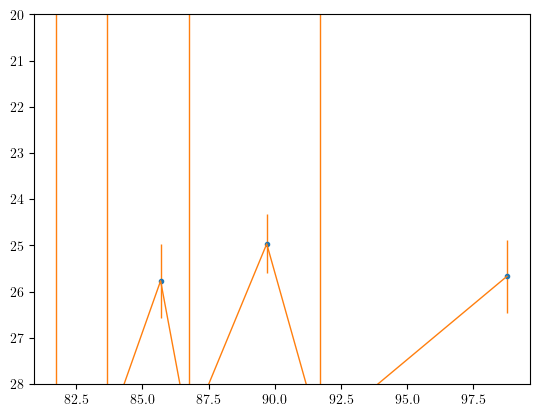

In [6]:
print(df['obs_peak'][0])

print(len(df['obs_times'][0]), len(df['obs_mag'][0]))
print(np.array(df['obs_times'][0]))
indices = np.array(df['obs_bands'][0]) == 'r'

print(df['obs_mag_error'][0])


for i in range(len(df['obs_times'][0])):
    print(df['obs_bands'][0][i], df['obs_mag'][0][i])

plt.figure()
plt.plot(np.array(df['obs_times'][0])[indices], np.array(df['obs_mag'][0])[:,0][indices], '.')
plt.errorbar(np.array(df['obs_times'][0])[indices], np.array(df['obs_mag'][0])[:,0][indices], 
             yerr=np.array(df['obs_mag_error'][0])[:,0][indices], lw=1)
plt.errorbar(np.array(df['obs_times'][0])[indices], np.array(df['obs_mag'][0])[:,1][indices], 
             yerr=np.array(df['obs_mag_error'][0])[:,1][indices], lw=1)

plt.ylim(28, 20)

### Calculate limiting magnitude including weather effects

In [7]:
import sncosmo

index = 8
zeropoint = df['zeropoint'][index]
skysig = np.array(df['skysig'][index])
mag_im = df['brightness_im'][index]
mag_im = mag_im[:len(zeropoint)]
bands = np.array(df['obs_bands'][index])

ab = sncosmo.get_magsystem('ab')
zpfluxes = np.array([ab.zpbandflux('lsst' + b) for b in bands])

print(bands)


KeyError: 'zeropoint'

In [ ]:
# Calculate limiting magnitude from sky noise and zeropoint
m_lim = zeropoint - 2.5*np.log10(5 * np.array(skysig))
print("Limiting magnitudes: ")
print(m_lim)

In [ ]:
# Convert image magnitudes back into fluxes
# flux_im = 10**(mag_im / -2.5) * zpfluxes

print(skysig[bands == 'r'])
print(skysig[bands == 'i'])
print(skysig[bands == 'z'])
print(skysig[bands == 'y'])

### Retrieve light curve observations

In [ ]:
print(min(df['brightness_unresolved'][0]))


times = np.array(df['obs_times'][0])
bands = np.array(df['obs_bands'][0])
mags = df['brightness_im'][0]
mags_unresolved = df['brightness_unresolved'][0]

print(times[-1] - times[0])
print(df['obs_end'][0] - df['obs_start'][0])
print(len(times))

mask_r = np.where(bands == 'r')
mask_i = np.where(bands == 'i')
mask_z = np.where(bands == 'z')
mask_y = np.where(bands == 'y')

print(df['brightness_im'][0][:,1][mask_y])

plt.figure()
plt.plot(times[mask_r], mags[:,0][mask_r], color='C0', label="r")
plt.plot(times[mask_r], mags[:,1][mask_r], color='C0')

plt.plot(times[mask_i], mags[:,0][mask_i], color='C1', label="i")
plt.plot(times[mask_i], mags[:,1][mask_i], color='C1')
plt.plot(times[mask_i], mags_unresolved[mask_i], '.', color='black')

plt.plot(times[mask_z], mags[:,0][mask_z], color='C2', label="z")
plt.plot(times[mask_z], mags[:,1][mask_z], color='C2')

plt.plot(times[mask_y], mags[:,0][mask_y], color='C3', label="y")
plt.plot(times[mask_y], mags[:,1][mask_y], color='C3')

plt.ylim(31, 22)
plt.ylabel("Apparent magnitude")
plt.xlabel("Time (days)")
plt.legend()


In [ ]:

"""
averages = [np.mean(t) for t in timings]
print(averages)
sums = [np.sum(t) for t in timings]
periods = [1,2,3,4,5,6,7,8,9,10,11]

plt.figure(1, figsize=(15, 5))
plt.plot(periods, averages[:11], '.', ms=10, color='midnightblue')

plt.figure(2, figsize=(15, 5))
plt.plot(periods, sums[:11], '.', ms=10, color='midnightblue')
"""

In [ ]:
"""
plt.figure(3)
plt.plot([1,2], sums[11:], '.', ms=20, color="C3")
print(sums[11], sums[12])
print(averages[11], averages[12])
print(averages[6])
"""

In [ ]:
# timings_200 = timings.copy()

In [ ]:
"""
mmaverages = [np.mean(t) for t in mmtimings]
mmsums = [np.sum(t) for t in mmtimings]
mmperiods = [1,2,3,4,5,6,7]
print(mmaverages)
print(mmsums)

plt.figure(4, figsize=(15, 5))
plt.plot(mmperiods, mmaverages, '.', ms=10, color='C1')

plt.figure(5, figsize=(15, 5))
plt.plot(mmperiods, mmsums, '.', ms=10, color='C1')
"""